# Correlation
### CA2 @ EPS Course

#### Instructors: Dr. Tavassolipour, Dr. Vahabie

---

### Instructions:
-  Replace the placeholders (between <font color="green">`## TODO ##`</font> and <font color="green">`## TODO ##`</font>) with the appropriate details.
- Ensure you run each cell after you've entered your solution.

---

*Full Name:* Ali Chegini

*SID:* 810801064

The objective of this notebook is to understand the concept of correlation.


In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

## Calculate Correlation
complete `correlation` function that calculate the correlation matrix of a data fram.

**Note:** you are not allowed to use `pandas.core.frame.DataFrame.corr()` method

In [78]:
def correlation(data: pd.DataFrame) -> pd.DataFrame:
    """
    Calculates the correlation matrix from a given dataset.

    Args:
        data (pandas.core.frame.DataFrame): The dataset, where each row represents an observation and each column represents a feature.

    Returns:
        correlation_matrix (pandas.core.frame.DataFrame): The correlation matrix.
    """
    ######################  TODO  ########################
    columns = data.columns
    
    correlation_matrix = pd.DataFrame(index=columns, columns=columns)
    
    for col1 in columns:
        for col2 in columns:
            covariance = ((data[col1] - data[col1].mean()) * (data[col2] - data[col2].mean())).mean()
        
            std_col1 = data[col1].std()
            std_col2 = data[col2].std()

            correlation = covariance / (std_col1 * std_col2)
            correlation_matrix.loc[col1, col2] = correlation
    
    return correlation_matrix
    ######################  TODO  ########################

In [79]:
######################  TODO  ########################
df = pd.read_csv("data/energy.csv")
######################  TODO  ########################

### Convert to Datetime and Extract Features

In [80]:
######################  TODO  ########################
df['Datetime'] = pd.to_datetime(df["Datetime"])

df['Date'] = df['Datetime'].dt.date
df['Year'] = pd.to_datetime(df['Datetime']).dt.year
df['Month'] = pd.to_datetime(df['Datetime']).dt.month
df['Day'] = pd.to_datetime(df['Datetime']).dt.day
df['Hour'] = pd.to_datetime(df['Datetime']).dt.hour

######################  TODO  ########################

### Plot Energy Usage Over Years

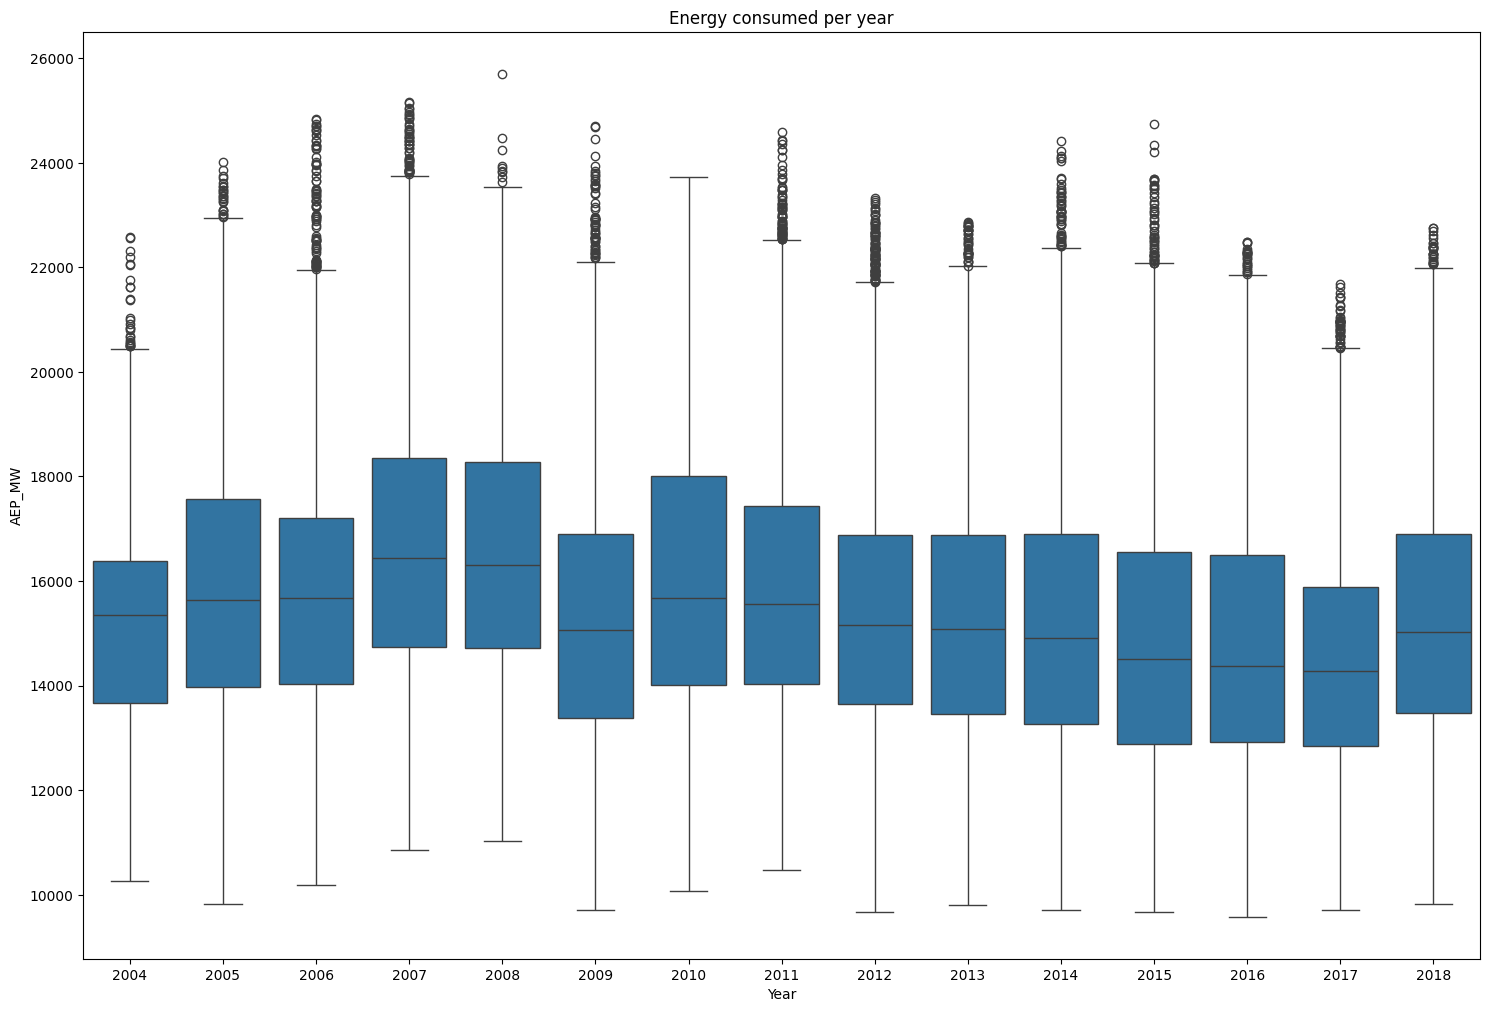

In [81]:
######################  TODO  ########################
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'Year', y = 'AEP_MW', data = df)
plt.tight_layout()
plt.title("Energy consumed per year")
plt.show()
######################  TODO  ########################

### Analyze Energy Usage Over Years

In comparison between two year 2004 and 2005 in terms of which has higher variance of of energy usage, we can conculude that 2004 energy usage variance is more because of:  
1. wider box which means that data has more varaiblity between 25th percentile and 75th percent
2. the whisker is longer in year 2005 than year 2004 and the means that our data for energy consumed is more spread in 2005 too.  

there can be other factors that can give us sense on variance but based on the first two described we can conculude that variance in year 2005 is bigger in value than year 2004. this hypothesis is checked down below:




In [82]:
######################  TODO  ########################
data_2004 = df[df['Year'] == 2004]
variance_2004 = data_2004['AEP_MW'].var()
print(f"Energy consumed varince in year 2004: {variance_2004}")

data_2005 = df[df['Year'] == 2005]
variance_2005 = data_2005['AEP_MW'].var()
print(f"Energy consumed varince in year 2005: {variance_2005}")
######################  TODO  ########################

Energy consumed varince in year 2004: 4312554.64327797
Energy consumed varince in year 2005: 6609516.545765586


Our hypothesis turned to be True! 
we can see that variance of year 2005 is bigger in value than year 2004

### Plot Energy Usage Over Hours

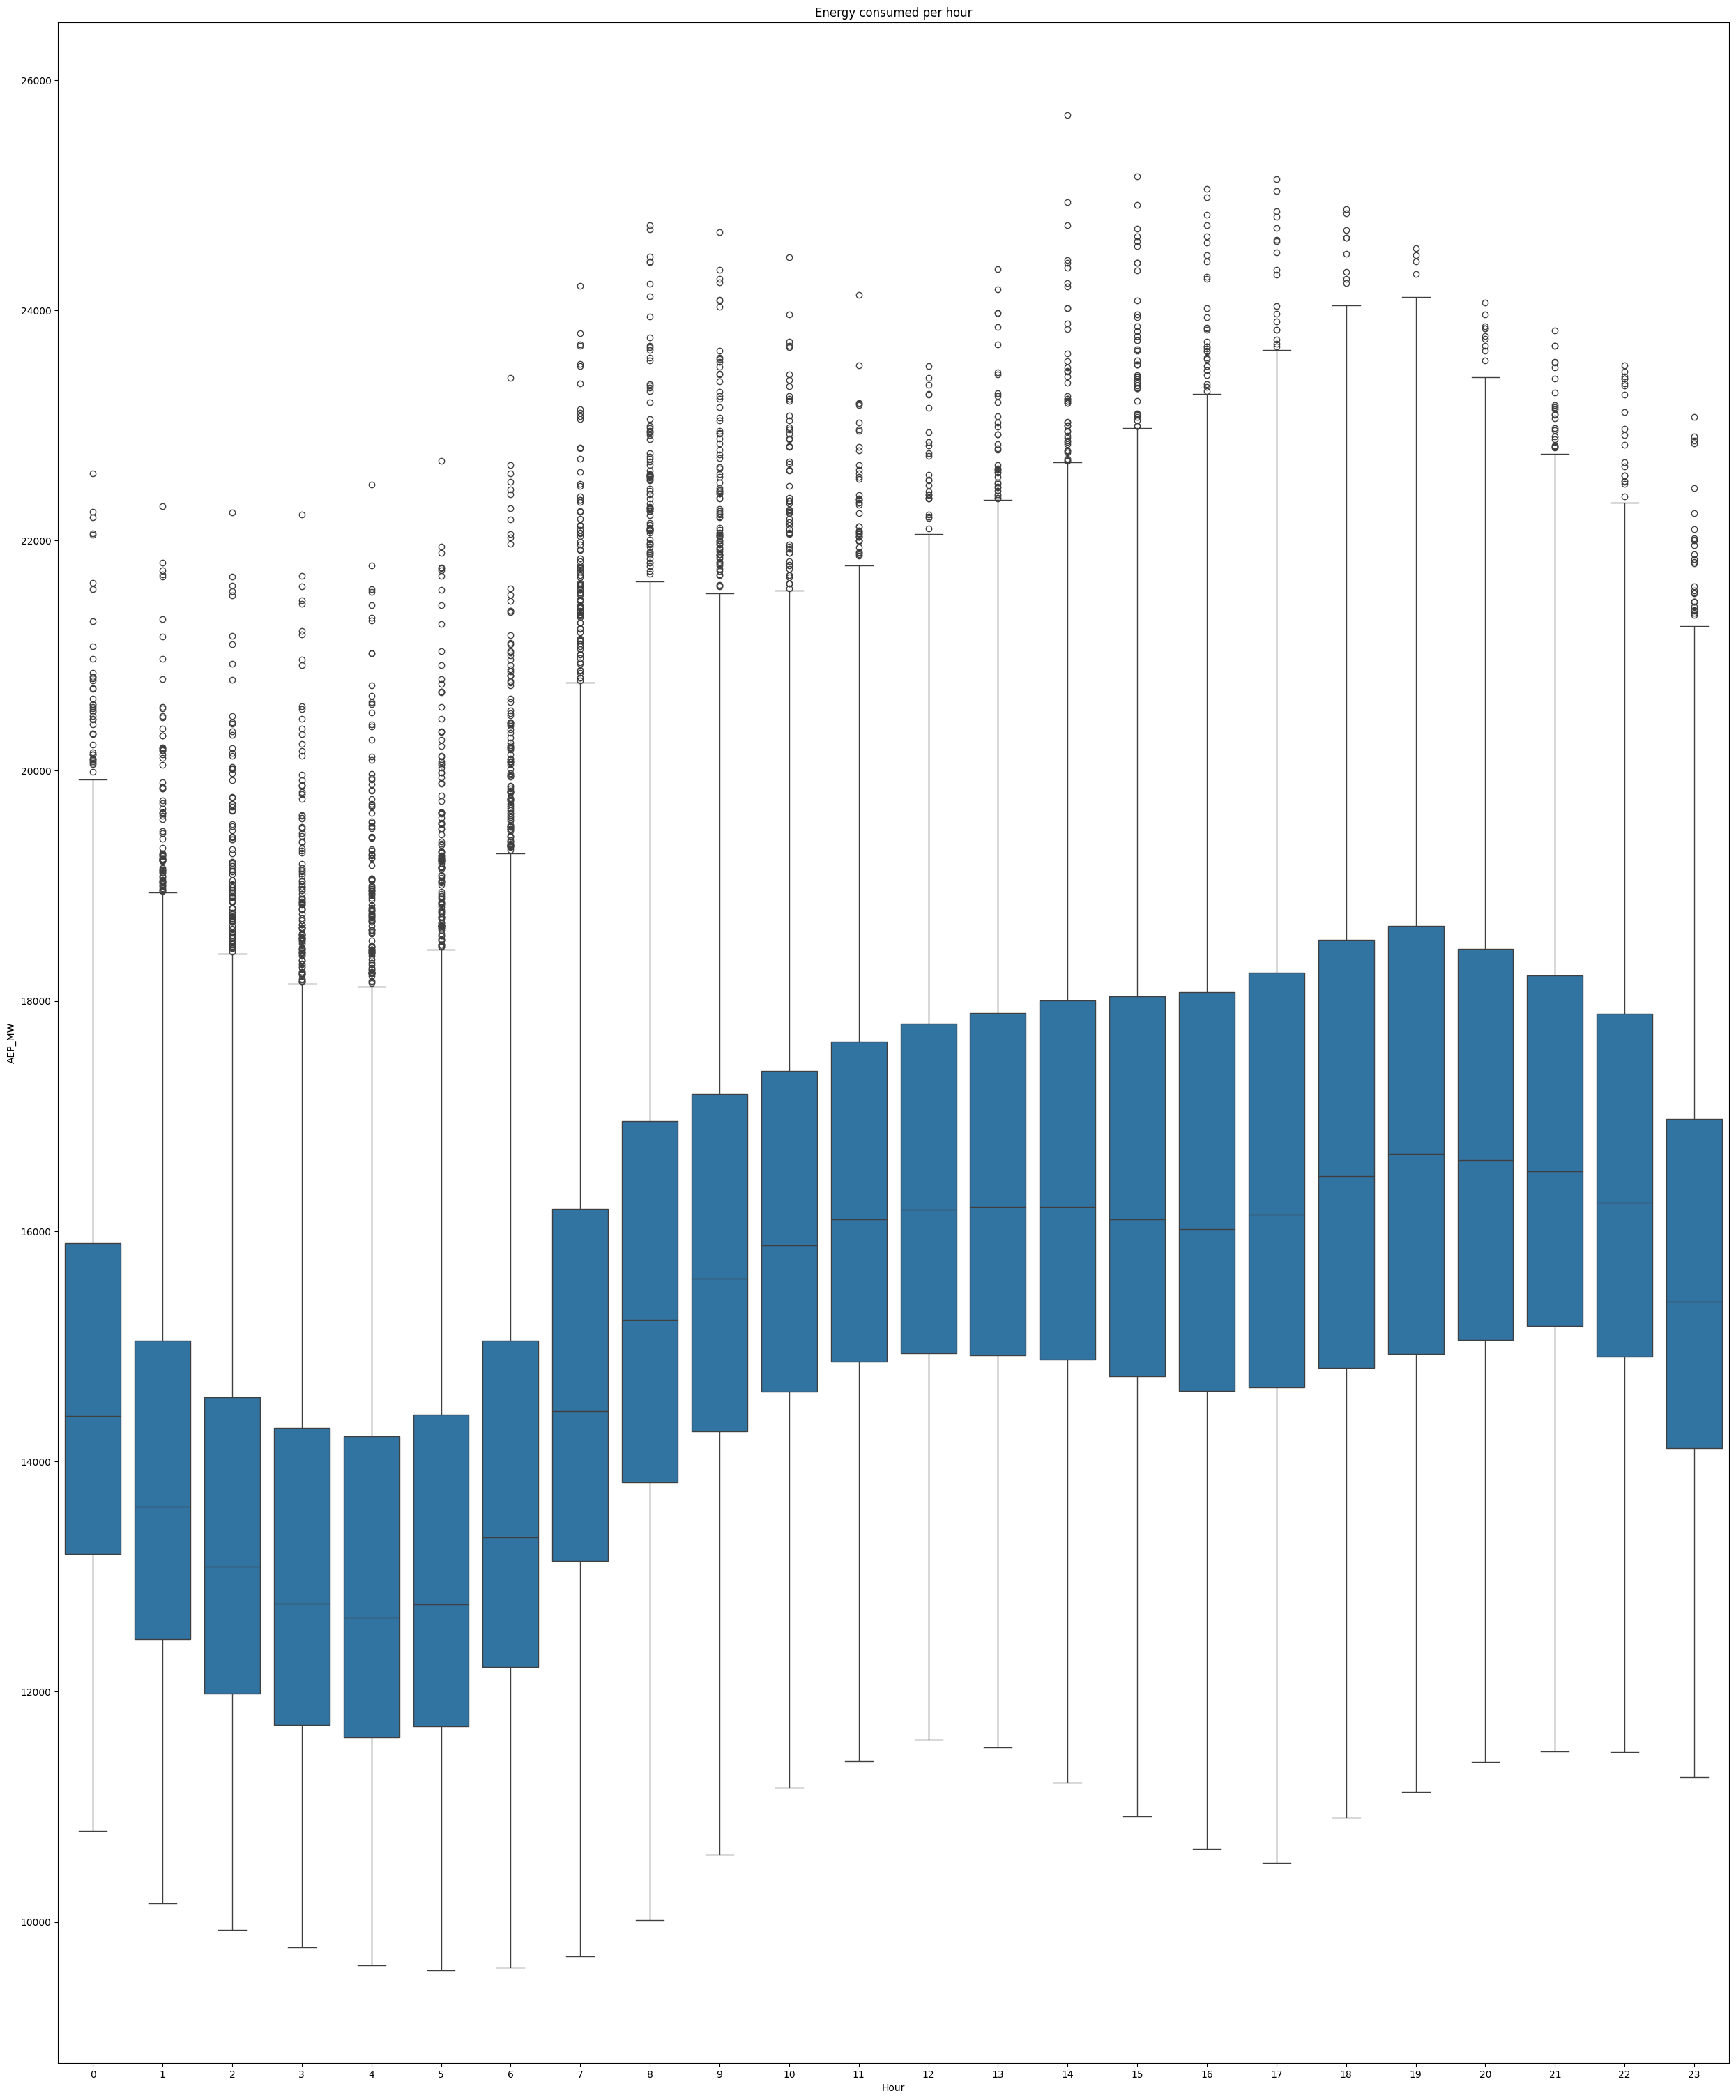

In [83]:
######################  TODO  ########################

plt.figure(figsize=(25, 30))
sns.boxplot(x = 'Hour', y = 'AEP_MW', data = df)

plt.tight_layout()
plt.title("Energy consumed per hour")
plt.show()
######################  TODO  ########################

### Plot Energy Usage Over Months

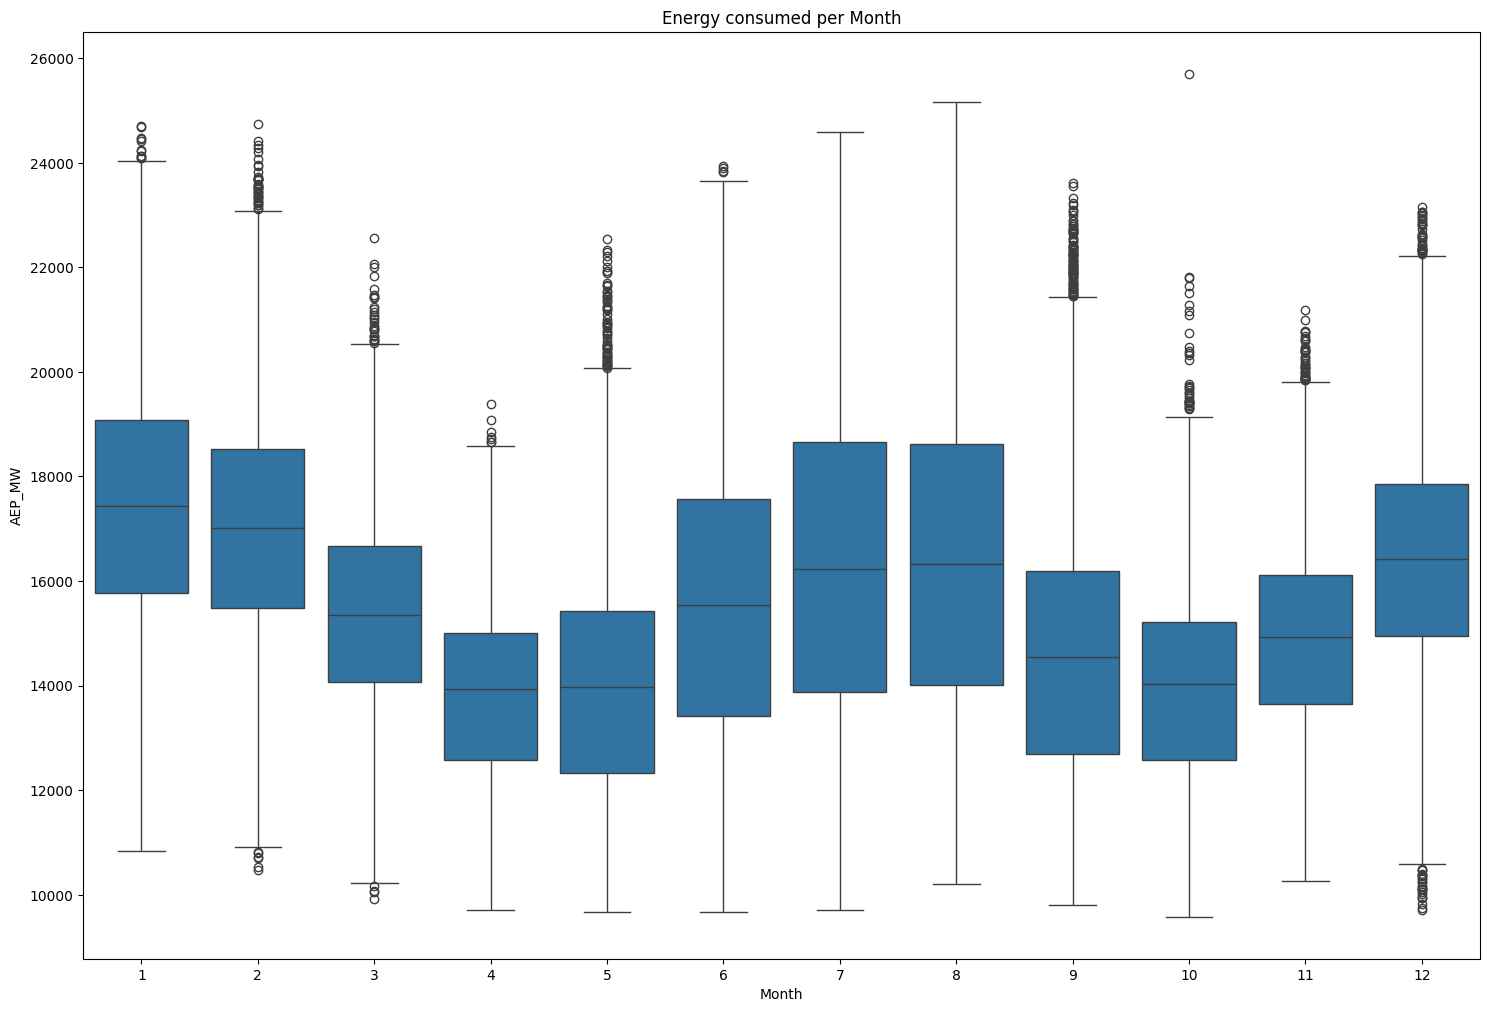

In [84]:
######################  TODO  ########################
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'Month', y = 'AEP_MW', data = df)

plt.tight_layout()
plt.title("Energy consumed per Month")
plt.show()
######################  TODO  ########################

### Calculate Correlation Between Specific Hours and Energy Usage

In [85]:
######################  TODO  ########################

df['Hour'] = pd.to_numeric(df['Hour'])
filtered_df1 = df[(df['Hour'] >= 4) & (df['Hour'] <= 13)]

numeric_columns = filtered_df1.select_dtypes(include=["number"])
correlation_matrix = correlation(numeric_columns)
print(f"Correlation between Hours between 4AM to 1PM and 'AEP_MW': {correlation_matrix.loc['Hour', 'AEP_MW']}")


df['Month'] = pd.to_numeric(df['Month'])
filtered_df2 = df[(df['Month'] >= 2) & (df['Month'] <= 4)]
numeric_columns = filtered_df2.select_dtypes(include=["number"])
correlation_matrix = correlation(numeric_columns)
print(f"Correlation between Month2 till month4 and 'AEP_MW': {correlation_matrix.loc['Month', 'AEP_MW']}")


filtered_df3 = df[(df['Month'] >= 10) & (df['Month'] <= 12)]
numeric_columns = filtered_df3.select_dtypes(include=["number"])
correlation_matrix = correlation(numeric_columns)
print(f"Correlation between Month10 till month12 and 'AEP_MW': {correlation_matrix.loc['Month', 'AEP_MW']}")


######################  TODO  ########################

Correlation between Hours between 4AM to 1PM and 'AEP_MW': 0.47136958340683016
Correlation between Month2 till month4 and 'AEP_MW': -0.5582259422420999
Correlation between Month10 till month12 and 'AEP_MW': 0.4738226294910568


### Analyze Correlation Between Specific Hours and Energy Usage

correlation coeffient between energy usage and hours between 4AM till 1PM is about 0.47 which shows a positive correlation that can be also seen in the boxplot graph and is compatable with what we expected.  

correlation between energy usage and months between second month of the year tll fourth year is a negative correlation and about -0.56 which also compatible with our box plot graph that shows a decline in energy usage . 

energy usage and months 10 to 12 has a positive correlation which is also seen both in the box plot graph and in the value that was calculated which is about 0.47


pattern in data considering months of a year

we expect for the energy consumption to be much higher in months which are in winter because of cold weather than months that are in summer for example and this pattern is seen in correlation between energy consumption and energy usage.  

between months 2 to 4 which is about Summer the energy consumption have a negative correlation with number of months but between months 10 to 12 we are noticing a positive correlation between number of months and energy consumption which is exactly what we expected. 

## Causal Effect

In [86]:
######################  TODO  ########################
data = pd.read_csv("data/TV_LE_Physician.csv")
numeric_columns = data.select_dtypes(include=["number"])
correlation_matrix = correlation(numeric_columns)

print("Correlation between Life Expectancy and Physicians:",
      correlation_matrix.loc["Life Expectancy (years)", "Physicians per 1000 people"])

print("Correlation between Life Expectancy and Televisions:",
      correlation_matrix.loc["Life Expectancy (years)", "Televisions per 1000 people"])

print("Correlation between Physicians and Televisions:",
      correlation_matrix.loc["Physicians per 1000 people", "Televisions per 1000 people"])
######################  TODO  ########################

Correlation between Life Expectancy and Physicians: 0.6281761317562722
Correlation between Life Expectancy and Televisions: 0.025848942659723834
Correlation between Physicians and Televisions: 0.00859310615415372


# Analyzing Causality

the numbers seen above tells us there is high correlation between Life Expectancy and Physicians per 1000 persons and very low correlation between Life Expectancy and number of Televisions or between number of Physicians and number of Televisions. 

for Life Expectancy and number of physicians per 1000 persons we can not intrepret it as a causal effect because we can only do that if if there is evidence that changing number of physicians directly changes in life expectancy so all we can say is that they are correlated.  

but for the question that which factor can cause this correlation we can think about different factors for example: 

1. Healthcare infrastructure
2. Socioeconomic Status
3. Public Health Policies
4. Cultural Factors